# Try for Magnetar PSR J1745-2900

In [1]:
#importamos en primer lugar los modulos que vayamos a usar
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base.transfer import EminGeV, EmaxGeV
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c

### Critical Energy of Conversion

In [2]:
m = 0.00396 # masa en microeV
B = 2.3e14 #el campo magnetico en Gauss

g = 1.01 #coupling constant 10^-11
M = 1/g #inverse coupling constant

In [3]:
Ecrit = ((m**2)*M)/(0.4*B)
print("La energía crítica de conversión es: ", Ecrit, "GeV")

La energía crítica de conversión es:  1.687645286267757e-19 GeV


### Photon Survival Probability

First, we need to set the ALP parameters:

In [4]:
m, g = 3.96, 1.01 #sacado del paper de MASC
alp = ALP(m, g)

Let's define an energy range for this example, in GeV.

In [5]:
EGeV = np.logspace(-20., -18., 500) #provisional, modificable

For the initial polarization, we'll use the following one:

In [6]:
pin = np.diag((1., 1., 0.))*0.5 #normalized

Let's generate the Source using the right parameters

In [7]:
src = Source(z=0.00000196, ra='17h45m40.16s', dec='-29d00m29.8s') #sacado de wikipedia, usado el redshift de Sagitario A por falta de datos

With the defined `alp`, `src`, initial polarization `pin` and energy range `EGeV`, we can now initialize our module list

In [8]:
ml = ModuleList(alp, src, pin=pin, EGeV=EGeV, seed=0)

In [9]:
ml.add_propagation(environ='ICMCell',
                   order=0,   # order of the module
                   B0=2.2e20,  # B field strength in microgauss
                   L0=1e-9,  # cell size
                   nsim=50,  # number of realizations
                   n0=5e-2,  # electron density from Brandon Calculations
                   r_abell=0.0000019445,  # full path in kpc, using the radius of the wind nebular
                   beta=0.,
                   eta=0.
                  )



ml.add_propagation("GMF",1, model = 'jansson12', model_sym = 'BSS') # finally, the beam enters the Milky Way Field

environs.py: 257 --- INFO: Using inputted chi
environs.py: 270 --- WARNING: r_abell <= L0: assuming one domain from 0. to L0
environs.py:1196 --- INFO: Using inputted chi


In [10]:
px, py, pa = ml.run()
print (pa.shape)

   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMCell'>
   core.py: 658 --- INFO: Running Module 1: <class 'gammaALPs.base.environs.MixGMF'>


(50, 500)


Text(0, 0.5, 'Photon survial probability')

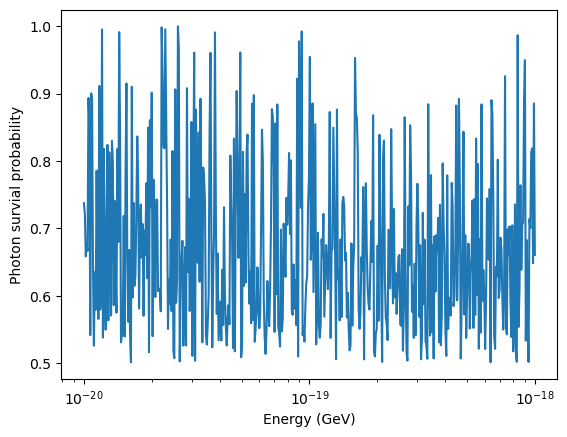

In [11]:
plt.semilogx(EGeV, px[0] + py[0])


#plt.legend()
#plt.gca().set_ylim(0.2,2.1)
plt.xlabel('Energy (GeV)')
plt.ylabel('Photon survial probability')

### Gráfica más Completa

Text(0, 0.5, 'Photon survial probability')

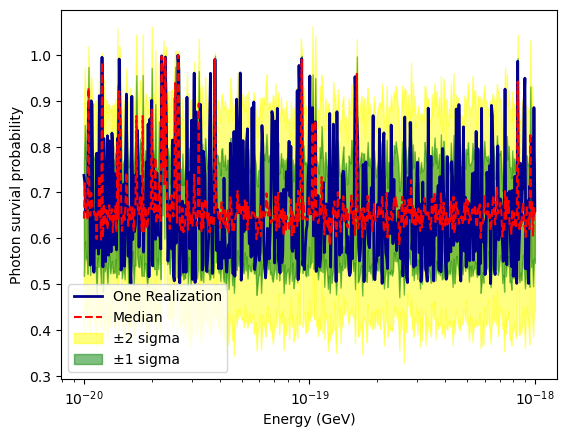

In [12]:
#calculamos mediana y STD

mediana = np.median(pa, axis=0)

sigma = np.std(1 - pa, axis=0)

#actualizamos nuestra grafica


plt.semilogx(EGeV, px[0] + py[0],
             label='One Realization',
             color='darkblue',
             lw = 2
            )


plt.plot(ml.EGeV, (1-mediana),
        label='Median',
        linestyle='--',
        color='red')


plt.fill_between(EGeV, 1 - mediana - 2*sigma, 1 - mediana + 2*sigma, color='yellow', alpha=0.5, label='±2 sigma')

plt.fill_between(EGeV, 1 - mediana - sigma, 1 - mediana + sigma, color='green', alpha=0.5, label='±1 sigma')






plt.legend()
#plt.gca().set_ylim(0.25,2.1)
plt.xlabel('Energy (GeV)')
plt.ylabel('Photon survial probability')